In [76]:
import pandas as pd;
import ipywidgets as widgets
from IPython.display import clear_output
import numpy as np
import random 
 
# function for returning region on basis of generation number
def regionChecker(argument):
    switcher = { 
        1: "Kanto",
        2: "Johto",
        3: "Hoenn",
        4: "Sinnoh",
        5: "Unova",
        6: "Kalos",
    } 
    return switcher.get(argument['Generation'], "nothing");

# generate random colors
def colors(n): 
  rgb_values = [] 
  r = int(random.random() * 256) 
  g = int(random.random() * 256) 
  b = int(random.random() * 256) 
  step = 256 / n 
  for _ in range(n): 
    r += step 
    g += step 
    b += step 
    r = int(r) % 256 
    g = int(g) % 256 
    b = int(b) % 256
    rgb_values.append((r/256,g/256,b/256)) 
  return rgb_values

# read data for csv
pokemon_data = pd.read_csv('./PokemonData.csv');

# adding origin of pokemon/using pokeindex as indexing
data = pd.DataFrame(pokemon_data);
data = data.rename(columns={'Num': 'Pokedex_Index'});
data['Region_of_Origin'] = data.apply (lambda row: regionChecker(row), axis=1);
# remove uber strong pokemons
data.drop_duplicates(subset ="Pokedex_Index", 
                     keep = False, inplace = True) 
data = data.set_index('Pokedex_Index');
data.head(10)

,Name,Type1,Type2,HP,Attack,Defense,SpAtk,SpDef,Speed,Generation,Legendary,Region_of_Origin
Pokedex_Index,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,Kanto
2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,Kanto
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False,Kanto
5,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False,Kanto
7,Squirtle,Water,NaN,44,48,65,50,64,43,1,False,Kanto
8,Wartortle,Water,NaN,59,63,80,65,80,58,1,False,Kanto
10,Caterpie,Bug,NaN,45,30,35,20,20,45,1,False,Kanto
11,Metapod,Bug,NaN,50,20,55,25,25,30,1,False,Kanto
12,Butterfree,Bug,Flying,60,45,50,90,80,70,1,False,Kanto


Dropdown(description='Attribute', index=3, options=('HP', 'Attack', 'Defense', 'SpAtk', 'SpDef', 'Speed'), val…

                                Name  SpAtk  Legendary
Pokedex_Index                                         
150              MewtwoMega Mewtwo Y    194       True
382              KyogrePrimal Kyogre    180       True
386               DeoxysAttack Forme    180       True
384            RayquazaMega Rayquaza    180       True
65             AlakazamMega Alakazam    175      False
...                              ...    ...        ...
554                         Darumaka     15      False
15             BeedrillMega Beedrill     15      False
213                          Shuckle     10      False
438                           Bonsly     10      False
349                           Feebas     10      False

[800 rows x 3 columns]


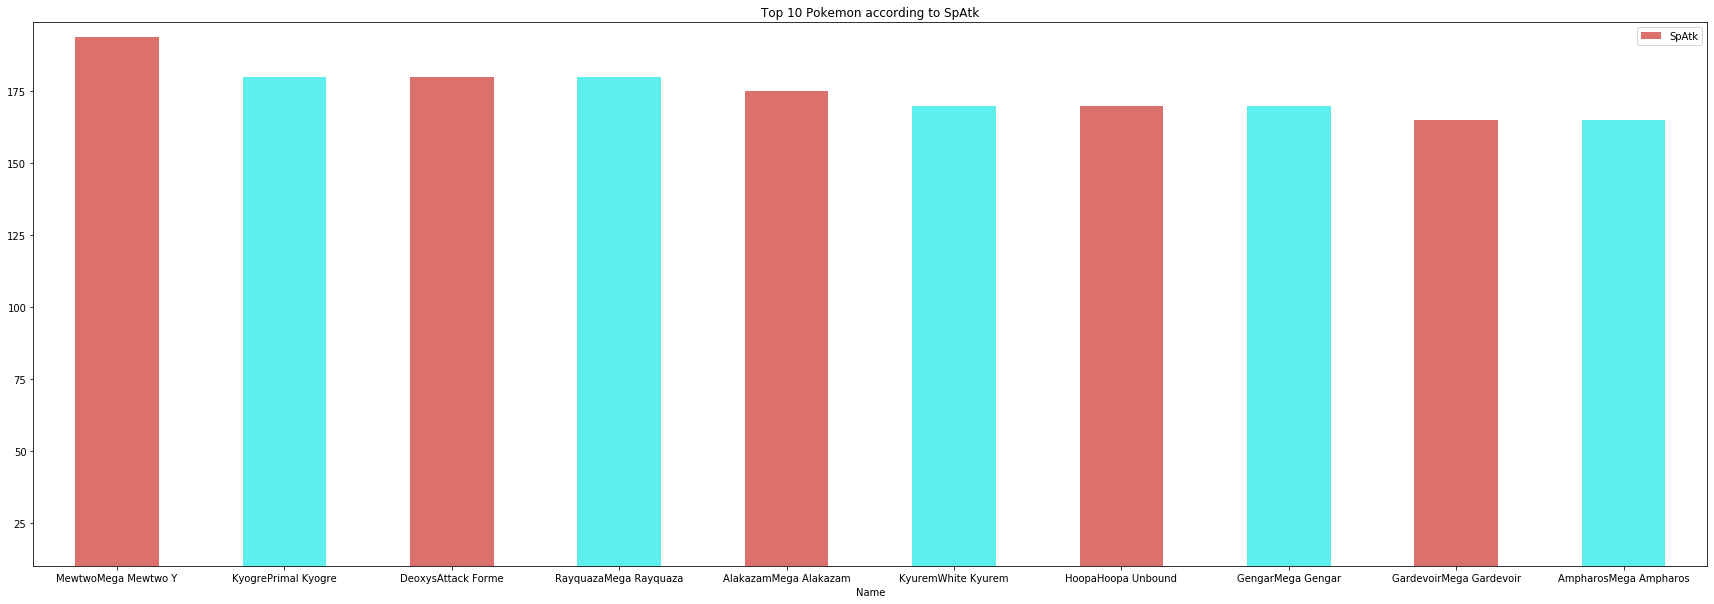

In [53]:
def attribute_data_handler(attrib):
    clear_output()
    attrib_data = data[['Name', attrib.new, 'Legendary']]
    display(attribute_dropdown)
    attrib_data = attrib_data.sort_values(by=attrib.new, ascending=False)
    print(attrib_data)
    maxYLimit = max(attrib_data[attrib.new])+5
    ax = attrib_data.head(10).plot(kind='bar',x='Name', y=attrib.new, rot=0, figsize=(30,10), 
                                   ylim=(min(attrib_data[attrib.new]),maxYLimit),
                                   title ='Top 10 Pokemon according to ' + attrib.new,
                                  color=colors(2))

attribute_dropdown = widgets.Dropdown(options=['HP','Attack','Defense', 'SpAtk','SpDef', 'Speed'],
                                      value=None,description='Attribute')
attribute_dropdown.observe(attribute_data_handler, names='value')
display(attribute_dropdown)

[(0.3984375, 0.97265625, 0.64453125), (0.5, 0.5, 0.5)]
